# [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
columns = [
    "ID", "Diagnosis",
    "radius1", "texture1", "perimeter1", "area1", "smoothness1",
    "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2",
    "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3",
    "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"
]
# 读取数据并将 ID 列作为索引
cancer = pd.read_csv("wdbc.data", header=None, names=columns, index_col="ID")

# 显示前 5 行
cancer.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer.shape

(569, 31)

In [4]:
X=cancer.drop(columns=['Diagnosis'])
y=cancer['Diagnosis']

In [5]:
y.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

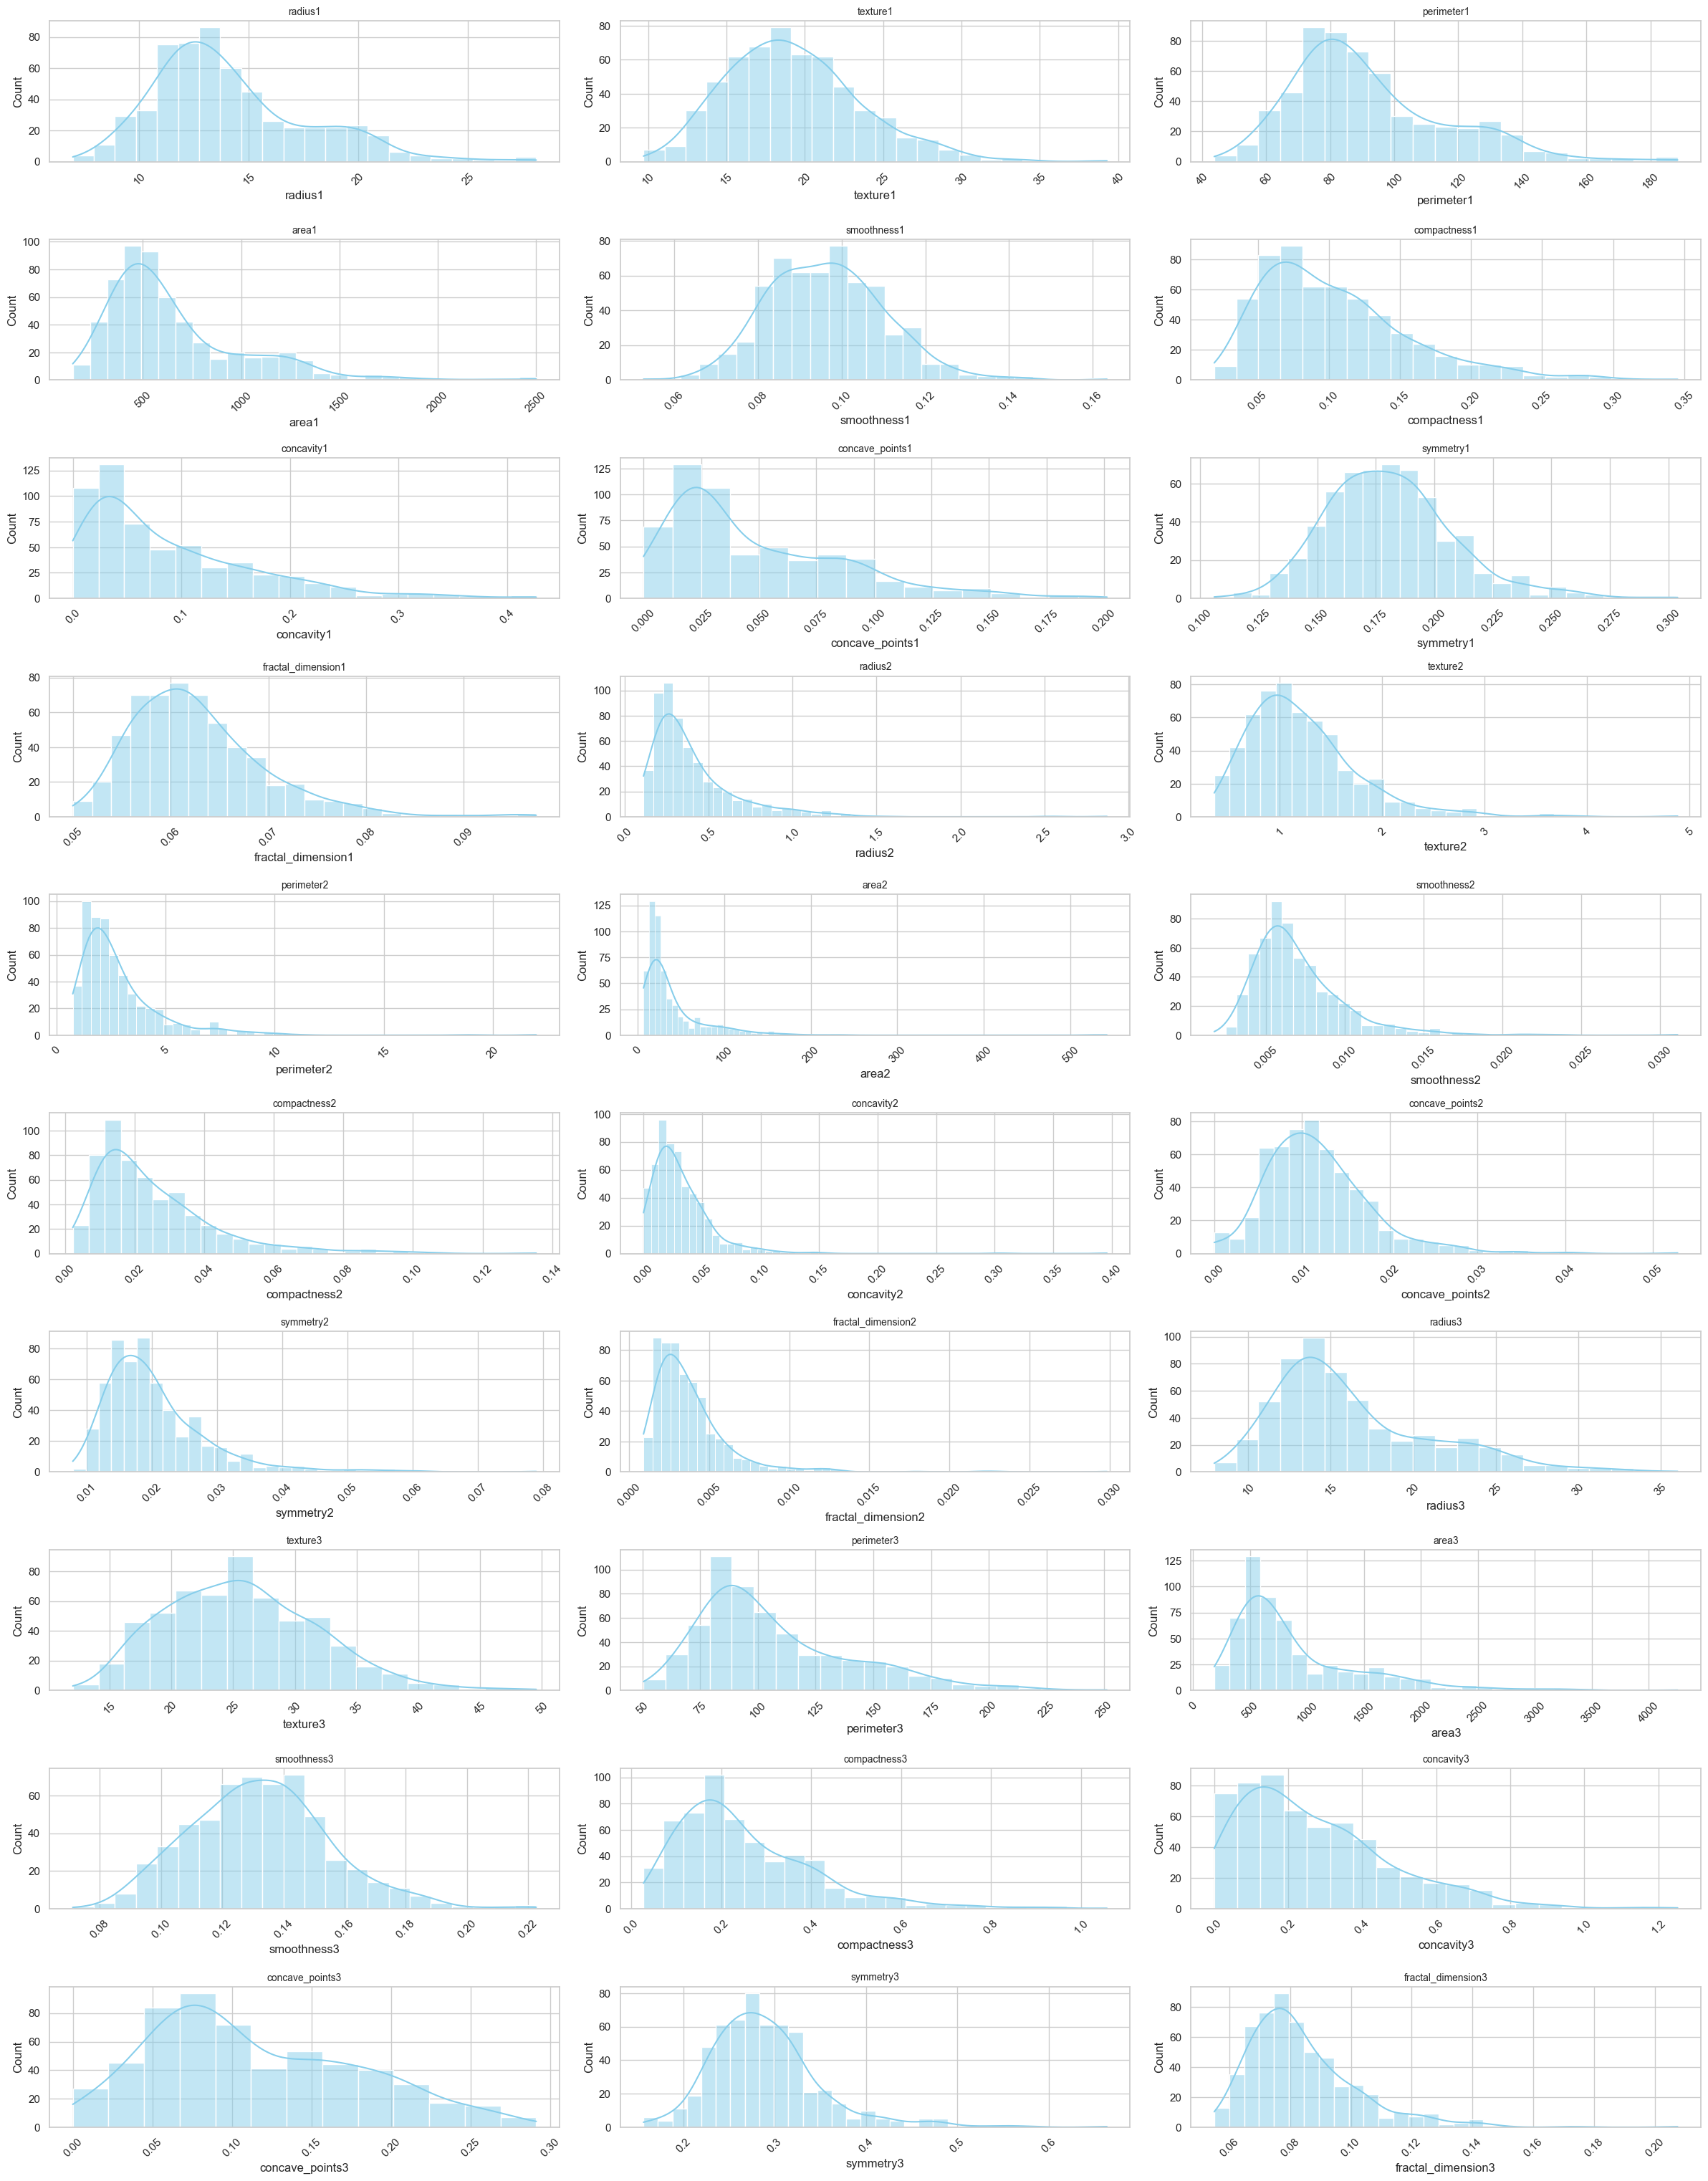

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = [col for col in cancer.columns if col != 'Diagnosis'] 
# 设置绘图风格
sns.set(style="whitegrid")

# 根据列数确定子图布局
num_cols = len(columns)
n_rows = (num_cols // 3) + 1
fig, axes = plt.subplots(n_rows, 3, figsize=(24, n_rows * 3))
axes = axes.flatten()

# 绘制每个数值列的分布图
for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(cancer[col], kde=True, ax=ax, color="skyblue")
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# 删除多余的空子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


=== 测试集性能评估 ===
测试集 AUC: 0.9979423868312757
分类报告:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

混淆矩阵:
 [[106   2]
 [  1  62]]


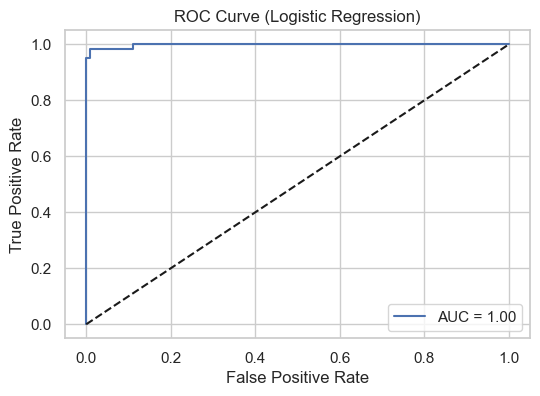

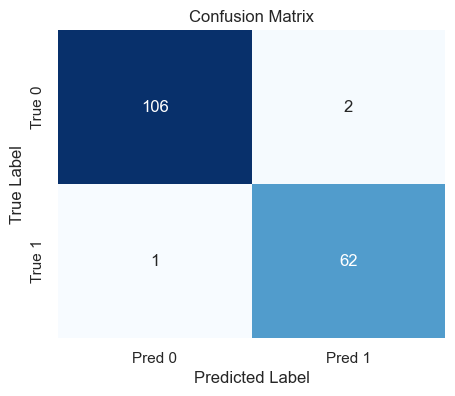

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n=== 测试集性能评估 ===")
print("测试集 AUC:", roc_auc_score(y_test, y_prob))
print("分类报告:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("混淆矩阵:\n", cm)

# ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.show()

# 混淆矩阵图
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()